In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('chennai_house_price_prediction.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [4]:
data.shape

(7109, 19)

In [5]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [7]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


# Data manipulation

In [8]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

- There are three variables which have missing values: 1 in N_BEDROOM,5 in N_BATHROOM and 48 in QS_OVERALL
- So we impute these missing values

## Imputing Missing Values

In [12]:
# Imputing missing values of N_BEDROOM
data['N_BEDROOM'].fillna(value = data['N_BEDROOM'].mode()[0], inplace = True)

# Imputing N_BATHROOM based on N_BEDROOM
for i in range(len(data)):
    if pd.isnull(data['N_BATHROOM'][i])==True:
        if data['N_BEDROOM'][i]>2.0:
            data['N_BATHROOM'][i]=2
        else: 
            data['N_BATHROOM'][i]=1

# Imputing QS_OVERALL with mean value of QS_ROOMS, QS_BATHROOM, QS_BEDROOM
for i in range(len(data)):
    if pd.isnull(data['QS_OVERALL'][i])==True:
        data['QS_OVERALL'][i]= (data['QS_ROOMS'][i] + data['QS_BEDROOM'][i] + data['QS_BATHROOM'][i])/3
        

In [13]:
# Checking all variables
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

- Now there is no missing values in any of the variables
- Now we further move to correct the Correcting the data types of the variables i.e. those who are categorical but have other data types

### Correcting Data types of the Variables

In [16]:
# Now cheking the categorical variables and continuous vars in the data
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

- Here we can see that N_BEDROOM, N_ROOM AND N_BATHROOM are categorical but have float or int data type
- so we have to correct that vars

In [17]:
data =data.astype({'N_BEDROOM':'object','N_BATHROOM':'object','N_ROOM':'object'})

In [18]:
# checking the data types 
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

### Correction of Spelling Errors of Categorical vars

In [25]:
# Making the list of categorical variables
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']

# Printing the value counts of each categories of each categorical vars of data
for i in temp:
    print('****************** Value counts for', i, '***********************')
    print(data[i].value_counts())
    print()

****************** Value counts for AREA ***********************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

****************** Value counts for N_BEDROOM ***********************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

****************** Value counts for N_BATHROOM ***********************
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

****************** Value counts for N_ROOM ***********************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

****************** Value counts for SALE_COND ***********************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         

* We can clearly see that there is a spelling errors in the vars 
    - AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET
* So we have to correct the spelling errors of each categories of above list

#### Replacing errored categories into right categories

In [26]:
# for AREA
clist = {'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar',
             'Ann Nagar':'Anna Nagar','Karapakam':'Karapakkam','Velchery':'Velachery', 'Adyr':'Adyar','KKNagar':'KK Nagar'}
data['AREA'].replace(clist, inplace = True)

# for SALE_COND
clist = {'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
data['SALE_COND'].replace(clist, inplace = True)

# for PARK_FACIL
data['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)

# for BUILDTYPE
data['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'}, inplace = True)
 # for UTILITY_AVAIL
data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'}, inplace=True)

# for STREET
data['STREET'].replace({'Pavd':'Paved','No Access': 'NoAccess'}, inplace = True )

In [27]:
# Now Checking again for the Categorical Vars
# Making the list of categorical variables
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']

# Printing the value counts of each categories of each categorical vars of data
for i in temp:
    print('****************** Value counts for', i, '***********************')
    print(data[i].value_counts())
    print()

****************** Value counts for AREA ***********************
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

****************** Value counts for N_BEDROOM ***********************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

****************** Value counts for N_BATHROOM ***********************
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

****************** Value counts for N_ROOM ***********************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

****************** Value counts for SALE_COND ***********************
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

****************** Value counts for PARK_FACIL ***********************
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

****************** Value co

* Now looks very clear spellings of each categories

# Univariate Analysis

In [28]:
# All Columns of the Data
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

### Hypothesis
*     Variables which impact on Sales price of the houses are:
        - SALE_PRICE
        - AREA
        - INT_SQFT
        - DIST_MAINROAD
        - N_BEDROOM, N_BATHROOM, N_ROOM
        - PARK_FACIL
        - BUILDTYPE
        - QS_OVERALL
        

#### 1. Sale Price

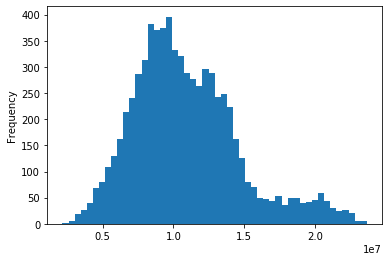

In [31]:
# plotting the histogram
data['SALES_PRICE'].plot.hist(bins = 50)

* plot clearly shows that there is a smaller number of house bought on high prices 
* The distribution of this plot is slightly right skewed

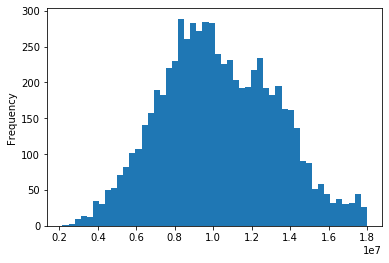

In [34]:
# plot for the sales price < 1.8e7
(data['SALES_PRICE'].loc[data['SALES_PRICE'] < 1.8e7]).plot.hist(bins = 50)

#### 2. INT_SQFT

Text(0.5, 0, 'Interior Area in Square Feet')

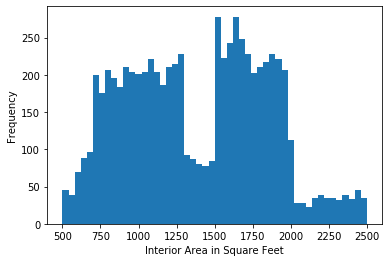

In [36]:
data['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Interior Area in Square Feet')

* There is smaller no of houses which have area < 750 and area > 2000 square feet
* Larger no of houses have area in between 750 to 1300 and 1500 to 2000 square feet

#### 3. AREA

In [40]:
data['AREA'].value_counts()/len(data)*100

Chrompet      23.941483
Karapakkam    19.215079
KK Nagar      14.024476
Velachery     13.799409
Anna Nagar    11.084541
Adyar         10.887607
T Nagar        7.047405
Name: AREA, dtype: float64

* Almost 24% of total houses are in Chrompet, 19% in Karapakkam, You can also see the percentages of other areas

Text(0, 0.5, 'No of houses')

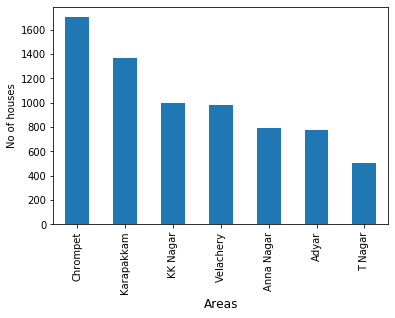

In [46]:
# Bar plot of these Areas 
data['AREA'].value_counts().plot(kind = 'bar')
plt.xlabel('Areas', fontsize = 12)
plt.ylabel('No of houses')

#### 4. DIST_Mainroad

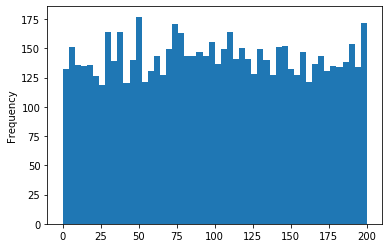

In [41]:
data['DIST_MAINROAD'].plot.hist(bins = 50)

* The plot is evenly distributed 
* There is no effect of this var on Sales price

#### 5. No_Bedrooms

In [48]:
data['N_BEDROOM'].value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

* Maximum no of houses have 1 and 2 rooms
* 4 bedroom houses are smaller in number

In [49]:
# in percentage
data['N_BEDROOM'].value_counts()/len(data)*100

1.0    53.397102
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

- Almost 53% of houses have 1 bedroom and 33% of houses have 2 bedrooms
- 3 or 4 bedroom houses are 9% and 3% respectively

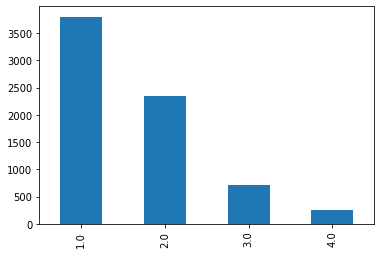

In [50]:
# bar plot 
(data['N_BEDROOM'].value_counts()).plot(kind = 'bar')

#### 6. N_BATHROOMS

In [51]:
data['N_BATHROOM'].value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

In [52]:
# IN percentage
data['N_BATHROOM'].value_counts()/len(data)*100

1.0    78.688986
2.0    21.311014
Name: N_BATHROOM, dtype: float64

- Almost 78% of houses have 1 bathroom and 21% have 2 bathrooms

#### 7. N_ROOM

In [53]:
data['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

- Larger Number of houses have 4 rooms
- very few have 2 or 6 rooms
- There is no house which have only one room

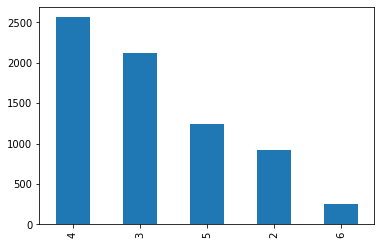

In [55]:
# bar plot
data['N_ROOM'].value_counts().plot(kind = 'bar')

In [56]:
# in pecentage 
data['N_ROOM'].value_counts()/len(data)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

- About 36% of houses have 4 rooms and 29% have 3 rooms

#### 8. PARK_FACIL

In [57]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [58]:
# IN PERCENTAGE
data['PARK_FACIL'].value_counts()/len(data)*100

Yes    50.457167
No     49.542833
Name: PARK_FACIL, dtype: float64

- The distribution is 50-50 

#### 9. BUILDTYPE

In [59]:
data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [60]:
# IN PERCENTAGE
data['BUILDTYPE'].value_counts()/len(data)*100

House         34.378956
Others        32.859755
Commercial    32.761289
Name: BUILDTYPE, dtype: float64

- almost 34% of house is built for House purposes, 32% for Others and 32% for Commercial purposes

#### 10. QS_OVERALL

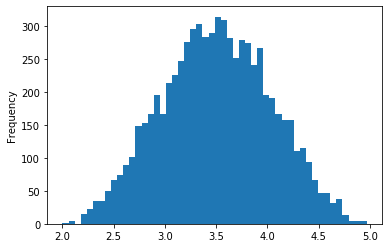

In [61]:
data['QS_OVERALL'].plot.hist(bins = 50)

- this plot is symmetric 
- LESS NO OF HOUSES WHICH HAVE OVERALL QUALITY SCORE < 2.5 AND > 4.5

# Bivariate Analysis

### Hypothesis

In [62]:
data.columns 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

* Sales price would be effected by
    - Interior Area (INT_SQFT)
    - N_BEDROOM, N_BATHROOM, N_ROOM
    - PARK_FACIL
    - BUILDTYPE with Parking Facility or without parking facility
    - UTILITY_AVAIL
    - May be on Street i.e. Paved, Gravel, No Access
    - MZZONE i.e. Agriculture, Industrial, Commercial, Residential Low Density,etc
    - Must depend on the Area where it is located (AREA)
    - Also depends on Overall quality score of the house
    

#### 1. Interior Area vs Sales Price

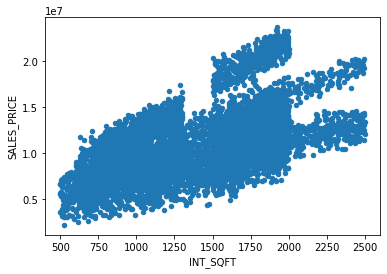

In [63]:
data.plot.scatter('INT_SQFT', 'SALES_PRICE')

- There is a linear relationship between them as the Interior area increases, Sales price increases
- But we can also see that plot is not evenly distributed in linear way 
- This may be the issue of BuildType i.e. the houses built for commercial purposes may high prices and so on 
- Let's see what happens?

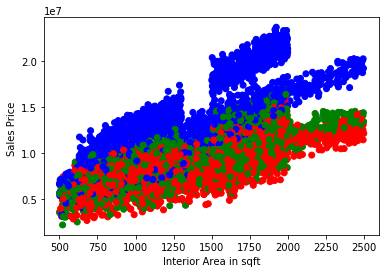

In [73]:
# scatter plot b/w two based on the BuildType
# defining colors for different Buildtypes
clr = {'Commercial':'blue','House':'red', 'Others':'green'}

# plotting
fig, ax = plt.subplots()
ax.scatter( data['INT_SQFT'], data['SALES_PRICE'], c = data['BUILDTYPE'].apply( lambda x: clr[x] ) )
plt.xlabel('Interior Area in sqft')
plt.ylabel('Sales Price ')
plt.show()

- Now plot clearly shows that the commercial prices really have high prices as compared to others 
- Hence the if we take the Sales price of particular Interior area based on build type, then they are highly corelated

#### 2. No of bedrooms, Bathrooms and Rooms vs Sales Price

In [72]:
data.pivot_table(values = 'SALES_PRICE', index = 'N_BEDROOM', columns = 'N_BATHROOM', aggfunc= 'median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


* table clearly shows that there is no houses which have 1 bedroom and 2 bathrooms
* also there is no houses whilch have 3 or 4 bedrooms and 1 bathroom
* Okay cool! Now look at the median prices 
    - 2 bedroom and 2 bathroom houses have relatively lower prices than others followed by 1 bedroom houses
    - As the Number of bedroom increases the sales price would high 

#### 3. Parking Facility

In [74]:
data.groupby('PARK_FACIL').SALES_PRICE.median()

PARK_FACIL
No      9815165
Yes    10768375
Name: SALES_PRICE, dtype: int64

- Sales Price of the House which have the parking facility are relatively high compared to no Paking facility

#### 4. Build type vs Sales price

In [75]:
data.pivot_table(values='SALES_PRICE', index = 'BUILDTYPE', aggfunc = 'median')

,SALES_PRICE
BUILDTYPE,
Commercial,13356200
House,8985370
Others,9637260


- Commercial houses houses are relatively costly than Others followed by House type

#### 5. Quality score vs Sales price

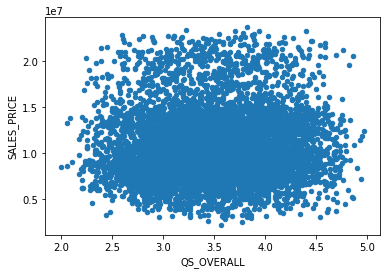

In [76]:
data.plot.scatter('QS_OVERALL','SALES_PRICE')

- No Dependency Seen in this plot 
- Hence Not so much effect on sales price
- Let's see other quality scores on the sales price

Text(0.5, 1.0, 'OVERALL Quality')

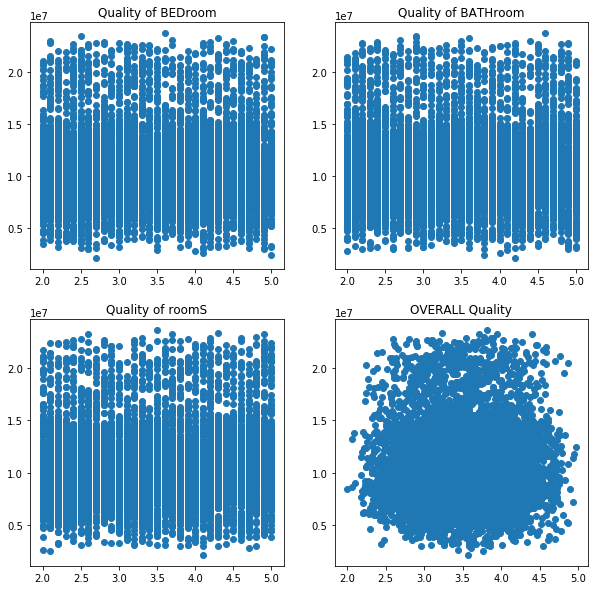

In [78]:
# SUBPLOTS OF OTHER QUALITY SCORES VS SALES PRICE
fig, axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

# 1st subplot quality of bedroom vs sales price
axs[0,0].scatter(data['QS_BEDROOM'], data['SALES_PRICE'])
axs[0,0]. set_title( 'Quality of BEDroom')

# 2ND subplot quality of bathroom vs sales price
axs[0,1].scatter(data['QS_BATHROOM'], data['SALES_PRICE'])
axs[0,1]. set_title( 'Quality of BATHroom')

# 3RD subplot quality of roomS vs sales price
axs[1,0].scatter(data['QS_ROOMS'], data['SALES_PRICE'])
axs[1,0]. set_title( 'Quality of roomS')

# 4tH subplot OVERALL quality vs sales price
axs[1,1].scatter(data['QS_OVERALL'], data['SALES_PRICE'])
axs[1,1]. set_title( 'OVERALL Quality')

- No any particular dependency seen in these plots
- Let's see the box plot for these quality scores 


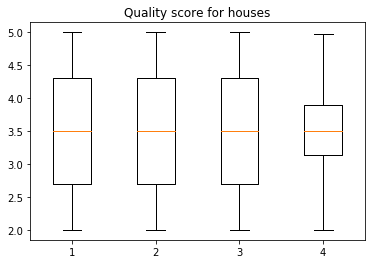

In [79]:
# Box plot for each quality scores 

#create an axes instace
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for houses')

bp= ax.boxplot( [ data['QS_BEDROOM'], data['QS_BATHROOM'], data['QS_ROOMS'], data['QS_OVERALL'] ] )

- distribution of quality scores for each house is same for qs bedroom, qs bathroom and qs rooms
- for the qs overall, 50% of houses have score in between 3.2 to 3.7 

#### 6. Area vs Sales Price

In [80]:
data.groupby('AREA').SALES_PRICE.median()

AREA
Adyar          8878350
Anna Nagar    13727895
Chrompet       9606725
KK Nagar      12146740
Karapakkam     7043125
T Nagar       14049650
Velachery     10494410
Name: SALES_PRICE, dtype: int64

- Houses at T Nagar are costly followed by Anna Nagar, KK Nagar, Velachery, Chrompet respectively
- Houses at Karapakkam are cheaper than others
- Houses with Extra facility would have higher prices 

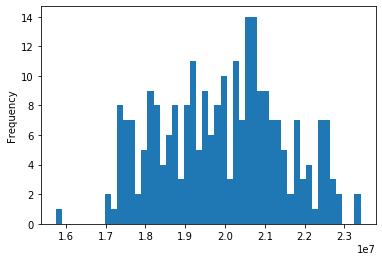

In [84]:
# checking the house price of commercial type at Anna Nagar

temp_data =data.loc[(data['BUILDTYPE']=='Commercial') & (data['AREA']=='Anna Nagar')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

- Commercial houses at Anna Nagar have sales Price ranges between 1.7e7 to 2.3e7

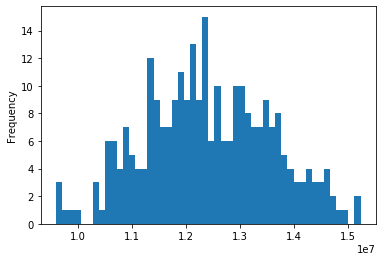

In [85]:
# checking the house price of house type at Anna Nagar

temp_data =data.loc[(data['BUILDTYPE']=='House') & (data['AREA']=='Anna Nagar')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

- At Anna Nagar, Houses of House Buildtype have sales prices ranges between 1.0e7 and 1.5e7
- It means that House Buildtype have lower price 

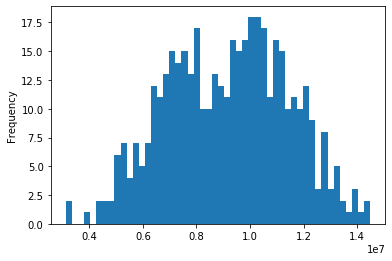

In [95]:
# checking commercial build type houses at Karapakkam
temp_data = data.loc[( data['BUILDTYPE']=='Commercial' ) & ( data['AREA']=='Karapakkam')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

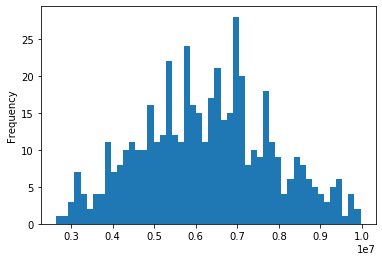

In [96]:
# checking House build type houses at Karapakkam
temp_data = data.loc[( data['BUILDTYPE']=='House' ) & ( data['AREA']=='Karapakkam')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

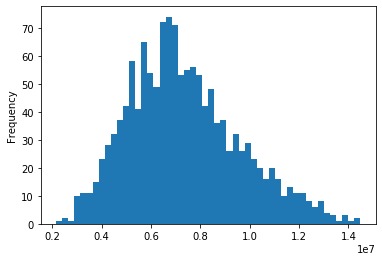

In [97]:
# checking houses at Karapakkam
temp_data = data.loc[(data['AREA']=='Karapakkam')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

- Houses at Karapakkam having the price range 0.2e7 to 1.4e7


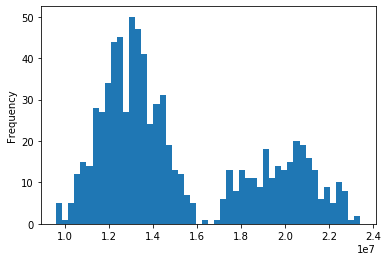

In [99]:
# checking houses at Karapakkam
temp_data = data.loc[( data['AREA']=='Anna Nagar')]
temp_data['SALES_PRICE'].plot.hist(bins = 50)

- Maximum number of houses at Anna Nagar have the price range between 1.0e7 to 1.6e7 and 1.7 to 2.3e7

#### 7. Utility Available vs Sales price

In [87]:
data.pivot_table(values = 'SALES_PRICE', index= 'UTILITY_AVAIL', aggfunc= 'median')

,SALES_PRICE
UTILITY_AVAIL,
AllPub,10696080
ELO,9650125
NoSeWa,10411700
NoSewr,10441640


- The median value are about same for all Utility available 
- That means there is no adverse effect of Utility available on Sales price

#### 7. Build type and parking facility vs Sales price

In [88]:
data.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

In [89]:
data.pivot_table(values='SALES_PRICE', index= 'BUILDTYPE', columns='PARK_FACIL', aggfunc = 'median')

PARK_FACIL,No,Yes
BUILDTYPE,,
Commercial,12692985,13920600
House,8514140,9468150
Others,9104645,10039405


- table clearly shows that for each buildtype with parking facility are costlier than with no parking facility

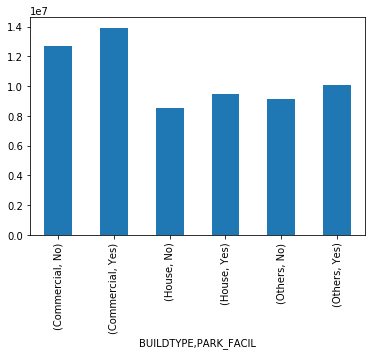

In [91]:
# plotting  each buildtype with parking facility or without parking facility
(data.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()).plot(kind = 'bar', stacked = True)

#### 8. Street vs Sales price

In [90]:
data.groupby('STREET').SALES_PRICE.median()

STREET
Gravel      10847225
NoAccess     9406050
Paved       10470070
Name: SALES_PRICE, dtype: int64

- Houses with the Gravel or Paved Street are costlier than having NoAccess Street

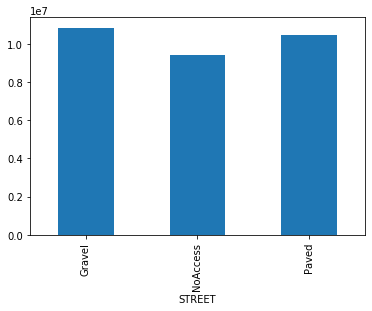

In [92]:
data.groupby('STREET').SALES_PRICE.median().plot(kind = 'bar')

#### 9. MZZone vs Sales Price

In [93]:
data.groupby('MZZONE').SALES_PRICE.median()

MZZONE
A      6928000
C      7721190
I      8312670
RH    10505240
RL    11184020
RM    11839510
Name: SALES_PRICE, dtype: int64

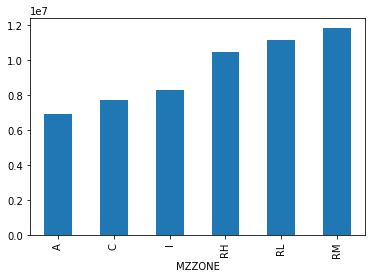

In [94]:
data.groupby('MZZONE').SALES_PRICE.median().plot(kind='bar', stacked= True)

- plot and table clearly shows that Residential Area with Medium Density houses are costlier 
- Houses built in Residential zones are costlier as compared to others like Industrial, Commercial, Agriculture
- Agriculture zones have cheaper houses

#### 10. Commission vs Sales Price

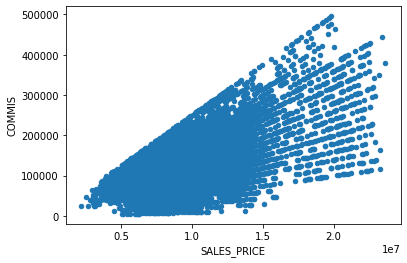

In [101]:
data.plot.scatter('SALES_PRICE','COMMIS')

- PLOT SHOWS THE LINEAR RELATIONSHIP BETWEEN THEM
- that means they are highly correlated
- Let's check thier correlation

In [102]:
# Checking the correlation
data[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


- Correlation between the sales price and commission is 0.62 that is really high

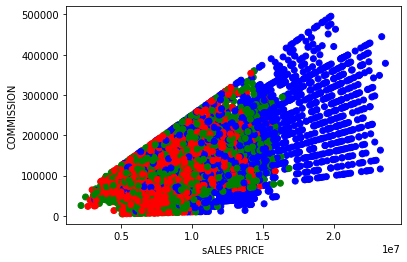

In [105]:
# plotting the scatter plot based on buildtype 
clr = {'Commercial':'blue','House':'red', 'Others':'green'}

# plotting
fig, ax = plt.subplots()
ax.scatter( data['SALES_PRICE'], data['COMMIS'], c = data['BUILDTYPE'].apply( lambda x: clr[x] ) )
plt.xlabel('sALES PRICE')
plt.ylabel('COMMISSION')
plt.show()

- Plot shows that
    - Commercial houses have to pay higher commisions
    - there is lesser commisions for the lowered price houses i.e. below 0.5e7 sales price 
    - As the commission increases the sales price would increases

In [106]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Linear Regression Model

- Building Linear Model as the problem is Linear Regression type
- Bcz the Dependent var SALES_PRICE is continuous in nature and we have to predict that

In [107]:
# Dropping Unwanted variables like PRT_ID
data.drop(['PRT_ID'], axis = 1, inplace = True)

In [109]:
# Coverting the Categorical variables into their dummies or indiacator variables 
data = pd.get_dummies(data)

#cheking  the data shape
data.shape

(7109, 49)

- No of columns has increased to 49 

In [110]:
# Check the top data
data.head()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_NoAccess,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,7600000,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,4.9,4.2,2.5,3.765,304049,21717770,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,4.1,3.8,2.2,3.090,92114,13159200,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,4.7,3.9,3.6,4.010,77042,9630290,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,3.0,2.5,4.1,3.290,74063,7406250,0,0,...,0,1,0,0,0,1,0,0,0,0


- now its looks fine 
- No any categorical values in the dataset 
- Now we have to Predict the linear model from the dataset 

### Building Model

In [111]:
# Dividing dataset into Dependent and Independent Variables i.e. Features and Target

X = data.drop('SALES_PRICE', axis = 1)        # FEATURES 
Y = data['SALES_PRICE']                       # TARGET

In [113]:
# TRAIN TEST SPLITTING

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 2)      # Test size 0.3 means 30% of the total data used for testing

# Checking the shapes for each
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4976, 48), (2133, 48), (4976,), (2133,))

In [114]:
# Creating a Linear Model and fitting the vars into it

from sklearn.linear_model import LinearRegression as LR 
from sklearn.metrics import mean_squared_log_error as MSLE

# Creating Model instance and fitting into it
lr = LR()
lr.fit(train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation : Root Mean Squared Log Error 

In [115]:
# prediction on train dataset 
train_pred = lr.predict(train_x)
train_score = np.sqrt(MSLE(train_y, train_pred))

# prediction on Test Dataset 
test_pred  = lr.predict(test_x)
test_score = np.sqrt(MSLE(test_y, test_pred))

In [116]:
print('Validation Score at Train Dataset is ', train_score)
print('Validation Score at Test Dataset  is ', test_score)

Validation Score at Train Dataset is  0.09096543637409892
Validation Score at Test Dataset  is  0.09460135668981401


- Looking at these validation score, there is small difference 
- So it looks like we predicted the right model

In [117]:
# Checking the coefficients of each vars
lr.coef_

array([ 3.86396715e+03, -5.42230197e+00, -2.61352290e+04, -4.32633398e+04,
       -3.55419861e+04,  1.81989639e+05,  2.60270681e+00,  7.92887559e+05,
        1.56186699e+06,  3.55007002e+05, -1.35150537e+06, -1.72040649e+06,
        1.60450067e+06, -1.24235037e+06,  2.88146250e+05, -8.96883185e+04,
       -4.46933383e+05,  2.48475452e+05,  2.10953579e+05, -2.10953579e+05,
       -8.10993694e+05, -6.02387321e+05,  1.46998544e+05,  1.01790702e+06,
        2.48475452e+05,  1.93043327e+04,  3.31214240e+05, -1.19409815e+05,
        3.94660199e+04, -2.70574777e+05, -5.04806304e+05,  5.04806304e+05,
        2.80804526e+06, -1.73904303e+06, -1.06900223e+06,  1.74767063e+05,
       -9.36595709e+04, -8.69461773e+04,  5.83868536e+03,  5.32051455e+05,
       -5.71148680e+05,  3.90972251e+04, -1.41171821e+06, -8.13772778e+05,
       -2.75476752e+05,  2.24921063e+05,  8.24529343e+05,  1.45151733e+06])